# The Multiple Comparisons Problem

## Introduction

In this lesson, you'll learn about the problems that can arise from doing multiple comparisons in a single experiment.

## Objectives

You will be able to:

- Explain why multiple comparisons increases the likelihood of misleading results 
- Explain the concept of spurious correlation 
- Use corrections to deal with multiple comparison problems 


## What is the multiple comparisons problem?

Obtaining an incredibly low p-value does not guarantee that the null-hypothesis is incorrect. For example, a p-value of 0.001 states that there is still a 1 in 1000 chance that the null hypothesis is true. Yet, as you've seen, p-values alone can be misleading. For example, if you perform repeated experiments, at some point you're apt to stumble upon a small p-value, whether or not the null hypothesis is valid.

To restate this, imagine we take 100 scientific studies with a p-value of 0.03. Are all of these conclusions valid? Sadly, probably not. Remember, for any experiment with a p-value of 0.03, there is still a 3% chance that the null-hypothesis is actually true. So collectively, the probability that **all** of these null hypotheses are false is actually quite small. You can be fairly confident in each study, but there is also apt to be a false-conclusion drawn somewhere. (In fact, the p-value itself implies that, on average, 3 of these 100 conclusions will be false.)

In [1]:
0.97**100 # Probability all 100 experiments with p=0.03 are all true 

0.04755250792540563

Similarly, if you are testing multiple metrics simultaneously in an experiment, the chances that one of these will satisfy your alpha threshold increases. A fun similar phenomenon is spurious correlation. If we start comparing a multitude of quantities, we are bound to find some quantities that are highly correlated, whether or not an actual relationship exists. Tyler Vigen set out to find such relationships; here are a few entertaining ones (of many):  

<img src="../../../../images/nicolas_cage_vs_drowning.svg">
<img src="../../../../images/chicken_vs_oil.svg">
<img src="../../../../images/math_phds_vs_uranium.svg">
<img src="../../../../images/spelling_vs_spiders.svg">



As we can see, although these graphs show that each pair of quantities is strongly correlated, it seems unreasonable to expect that any of them have any causal relationships. Regardless of what the statistics tell us, there is no relationship through which the length of spelling bee word affects the number of people killed by venomous spiders

# Multiple Comparisons

In [7]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
np.random.seed(seed=42) # make example reproducible
# Dataset

n_samples, n_features = 100, 1000
n_info = int(n_features/10) # number of features with information
n1, n2 = int(n_samples/2), n_samples - int(n_samples/2)
snr = .5
Y = np.random.randn(n_samples, n_features)
grp = np.array(["g1"] * n1 + ["g2"] * n2)

# Add some group effect for Pinfo features
Y[grp=="g1", :n_info] += snr


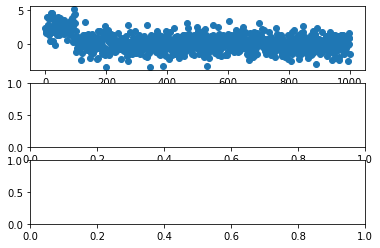

In [8]:
tvals, pvals = np.full(n_features, np.NAN), np.full(n_features, np.NAN)

for j in range(n_features):
    tvals[j], pvals[j] = stats.ttest_ind(Y[grp=="g1", j], Y[grp=="g2", j], equal_var=True)
    
    
fig, axis = plt.subplots(3, 1)#, sharex='col')
axis[0].plot(range(n_features), tvals, 'o')
axis[0].set_ylabel("t-value")

axis[1].plot(range(n_features), pvals, 'o')
axis[1].axhline(y=0.05, color='red', linewidth=3, label="p-value=0.05")
#axis[1].axhline(y=0.05, label="toto", color='red')
axis[1].set_ylabel("p-value")
axis[1].legend()
axis[2].hist([pvals[n_info:], pvals[:n_info]],
stacked=True, bins=100, label=["Negatives", "Positives"])
axis[2].set_xlabel("p-value histogram")
axis[2].set_ylabel("density")
axis[2].legend()
plt.tight_layout()